# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [5]:
DATA_FOLDER = 'Data/' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [5]:
# Write your answer here


# Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [6]:
# Write your answer here

# Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [7]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [40]:
DF_T = pd.read_excel(DATA_FOLDER + 'titanic.xls')
DF_T.rename(columns={'home.dest': 'home_dest'}, inplace=True)

## 1. Attribute Type and Range

1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 

There are a total of 14 attributes of which 8 are Numerical and 6 are Catagorical. For some of the features, we have used the description of a similar dataset at (https://www.kaggle.com/c/titanic/data).

In [41]:
DF_T.columns.tolist()

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home_dest']

### Numerical

**age** numerical, float, range: {0.1667, ..., 80.0}, the age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

In [42]:
DF_T['age'].value_counts().sort_index().head()

0.1667    1
0.3333    1
0.4167    1
0.6667    1
0.7500    3
Name: age, dtype: int64

**sibsp** numerical, integer, range: {0, 1, 2, 3, 4, 5, 8}, the number of sibilings and/or spouse.

In [43]:
DF_T['sibsp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64

**parch** numerical, integer, range: {0, 1, 2, 3, 4,5, 6, 9}, the number of parents / children aboard the Titanic

In [44]:
DF_T['parch'].value_counts().sort_index()

0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: parch, dtype: int64

**fare** numerical, float, range: {0, ..., 512.3292}

In [45]:
DF_T['fare'].value_counts().sort_index().head()

0.0000    17
3.1708     1
4.0125     1
5.0000     1
6.2375     1
Name: fare, dtype: int64

**body** numerical, int, range: {1, 4, 7, ..., 328}

In [46]:
DF_T['body'].value_counts().sort_index().head()

1.0     1
4.0     1
7.0     1
9.0     1
14.0    1
Name: body, dtype: int64

### Catagorical

**pclass** catagorical,  range: {1, 2, 3}

In [47]:
DF_T['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

**survived** catagorical, binary-valued {0, 1}

In [48]:
DF_T['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

**name** categorical, string

In [49]:
DF_T['name'].value_counts().head()

Connolly, Miss. Kate                            2
Kelly, Mr. James                                2
Vendel, Mr. Olof Edvin                          1
Andersson, Mr. August Edvard ("Wennerstrom")    1
Palsson, Master. Gosta Leonard                  1
Name: name, dtype: int64

**sex** catagorical, binary-valued {male, female}

In [50]:
DF_T['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

**ticket** catagorical, coded ticket number (string)

In [303]:
DF_T['ticket'].value_counts().head()

CA. 2343    11
CA 2144      8
1601         8
347077       7
3101295      7
Name: ticket, dtype: int64

**cabin** catagorical, string

In [53]:
DF_T['cabin'].value_counts().head()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C78                4
F4                 4
Name: cabin, dtype: int64

**embarked** catagorical, range: {S, C, Q}

In [54]:
DF_T['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

**boat** catagorical, string

In [55]:
DF_T['boat'].value_counts()

13         39
C          38
15         37
14         33
4          31
10         29
5          27
3          26
11         25
9          25
8          23
7          23
16         23
6          20
D          20
12         19
2          12
A          11
B           9
1           5
C D         2
5 7         2
13 15       2
8 10        1
13 15 B     1
2           1
15 16       1
5 9         1
Name: boat, dtype: int64

In [68]:
# TODO: We observe that some individuals have been registered on multiple boats. 

**home.dest** catagorical, string

In [58]:
DF_T['home_dest'].value_counts().head()

New York, NY            64
London                  14
Montreal, PQ            10
Cornwall / Akron, OH     9
Paris, France            9
Name: home_dest, dtype: int64

### Transforming the catagorical values

Of the 9 caatagorical attributes, "name" is not useful because it is unique to each person. Attributes **sex, cabin, embarked, boat, home.dist, pclass** and **survived** represent meaningful catagories, and thus we are going to transform them  to the type 'Categorical'. But first we need to apply some other transformations:

### Turning multi-valued cabin feature to a list of values:

In [127]:
DF_T_trans = DF_T.copy()

def treat_cabin(cabin_in):
    # TODO: this function can be deleted.
    import re
    total_list = []
    if not pd.isnull(cabin_in):
        cabin_list = str(cabin_in).split(' ')
        for elem in cabin_list:
            
            try: 
                res = re.match(r'([A-Z]{1,2})(\d{1,3})', elem)
                cabin_floor = res[1]
                cabin_num = int(res[2])
                total_list.append([cabin_floor, cabin_num])
            except TypeError:
                return
    return total_list

def cabin_floor(cabin_in):
    import re
    total_list = []
    floor = 'Undefined'
    if not pd.isnull(cabin_in):
        cabin_list = str(cabin_in).split(' ')
        for elem in cabin_list:
            try: 
                res = re.match(r'([A-Z]{1,2})(\d{1,3})', elem)
                cabin_floor = res[1]
                total_list.append(cabin_floor)
            except TypeError:
                return
        if len(set(total_list)) > 1:
            raise Exception('cabin floors is not matching!')
        else:
            floor = total_list[0]
    return floor

DF_T_trans = DF_T_trans.assign(cabin_floor = DF_T_trans['cabin'].apply(cabin_floor))

In [64]:
DF_T_trans.sex = DF_T_trans.sex.astype('category')
DF_T_trans.cabin = DF_T_trans.ticket.astype('category')
DF_T_trans.embarked = DF_T_trans.embarked.astype('category')
DF_T_trans.boat = DF_T_trans.boat.astype('category')
DF_T_trans.home_dest = DF_T_trans.home_dest.astype('category')
DF_T_trans.pclass = DF_T_trans.pclass.astype('category')
DF_T_trans.survived = DF_T_trans.survived.astype('category')

In [123]:
DF_T_trans

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,cabin_floor
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",B
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",C
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",C
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",E
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",D
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",A
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",C
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",


## Histograms

2.Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 

### PClass

<Container object of 3 artists>

([<matplotlib.axis.XTick at 0x11673fc50>,
 <a list of 3 Text xticklabel objects>)

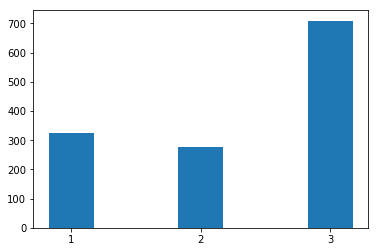

In [66]:
series = DF_T_trans['pclass'].dropna().value_counts().sort_index()
cats = series.keys().tolist()
freq = series.values.tolist()

index = np.arange(len(cats))
bar_width = 0.35

plt.bar(index, freq, bar_width)
# plt.xlabel('Embarking Port')
# plt.ylabel('Number')
plt.xticks(index, cats)

plt.show()

### Embarkation Port

<Container object of 3 artists>

([<matplotlib.axis.XTick at 0x116819470>,
 <a list of 3 Text xticklabel objects>)

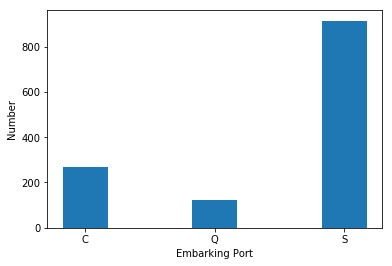

In [67]:
series = DF_T_trans['embarked'].dropna().value_counts().sort_index()
cats = series.keys().tolist()
freq = series.values.tolist()


index = np.arange(len(cats))
bar_width = 0.35

plt.bar(index, freq, bar_width)
plt.xlabel('Embarking Port')
plt.ylabel('Number')
plt.xticks(index, cats)

plt.show()

### Sex

<Container object of 2 artists>

([<matplotlib.axis.XTick at 0x116cc3240>,
 <a list of 2 Text xticklabel objects>)

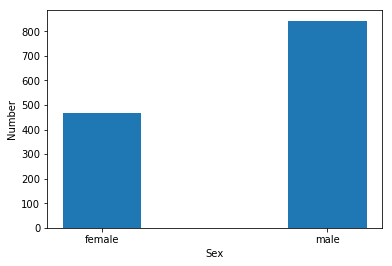

In [75]:
series = DF_T_trans['sex'].dropna().value_counts().sort_index()
cats = series.keys().tolist()
freq = series.values.tolist()


index = np.arange(len(cats))
bar_width = 0.35

plt.bar(index, freq, bar_width)
plt.xlabel('Sex')
plt.ylabel('Number')
plt.xticks(index, cats)

plt.show()

### Age

(array([ 62.,  15.,  10.,   7.,   4.,   0.,   0.,   0.,   0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <a list of 9 Patch objects>)

([<matplotlib.axis.XTick at 0x117381160>,
 <a list of 10 Text xticklabel objects>)

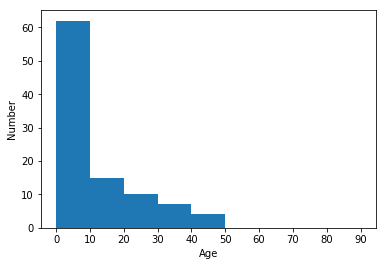

In [84]:
series = DF_T_trans['age'].dropna().value_counts().sort_index()
freq = series.values.tolist()


index = np.arange(len(cats))
bar_width = 0.35

plt.hist(freq, bins = np.arange(0,100,10))
plt.xlabel('Age')
plt.ylabel('Number')
plt.xticks(np.arange(0,100,10))
plt.show()

## Cabin

3.Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.


In the transformations, we derived the cabin floor as a seperate feature, using that, we have:

([<matplotlib.patches.Wedge at 0x11ca3e128>,
  <matplotlib.text.Text at 0x11cf48780>])

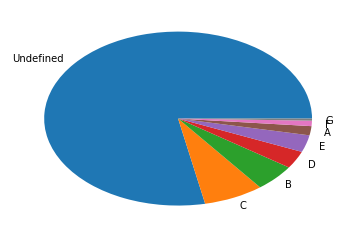

([<matplotlib.patches.Wedge at 0x11d28c128>,
  <matplotlib.text.Text at 0x11cdbf588>])

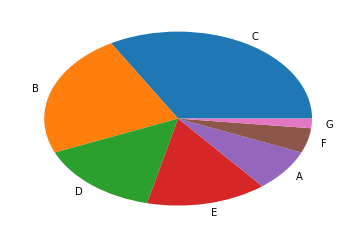

In [167]:
series = DF_T_trans.cabin_floor.value_counts()
cats = series.keys().tolist()
freq = series.values.tolist()
index = np.arange(len(cats))

plt.pie(freq, labels=cats, )
# plt.xlabel('Embarking Port')
# plt.ylabel('Number')
# plt.xticks(index, cats)
plt.show()
plt.close()

# print(type(series))
no_undefined = series.drop('Undefined')
cats = no_undefined.keys().tolist()
freq = no_undefined.values.tolist()
index = np.arange(len(cats))
plt.pie(freq, labels=cats, )
plt.show()
plt.close()

## Travel Class

4.For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.

There are 3 main travel classes:

([<matplotlib.patches.Wedge at 0x11ce01a90>,
  <matplotlib.text.Text at 0x11f8b6a20>])

([<matplotlib.patches.Wedge at 0x11dfce278>,
  <matplotlib.text.Text at 0x11f7afeb8>])

([<matplotlib.patches.Wedge at 0x11ee597b8>,
  <matplotlib.text.Text at 0x11f933e48>])

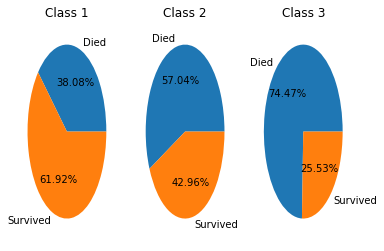

In [188]:
series = DF_T_trans.loc[DF_T_trans.pclass == 1]['survived'].value_counts().sort_index()
freq = series.values.tolist()
plt.subplot(1,3, 1)
plt.pie(freq, labels=['Died', 'Survived'], autopct='%.2f%%')
# plt.xlabel('Embarking Port')
# plt.ylabel('Number')
# plt.xticks(index, cats)
plt.title('Class 1')

series = DF_T_trans.loc[DF_T_trans.pclass == 2]['survived'].value_counts().sort_index()
freq = series.values.tolist()
plt.subplot(1,3, 2)
plt.pie(freq, labels=['Died', 'Survived'], autopct='%.2f%%')
# plt.xlabel('Embarking Port')
# plt.ylabel('Number')
# plt.xticks(index, cats)
plt.title('Class 2')

series = DF_T_trans.loc[DF_T_trans.pclass == 3]['survived'].value_counts().sort_index()
freq = series.values.tolist()
plt.subplot(1,3, 3)
plt.pie(freq, labels=['Died', 'Survived'], autopct='%.2f%%' )
# plt.xlabel('Embarking Port')
# plt.ylabel('Number')
# plt.xticks(index, cats)
plt.title('Class 3')

plt.show()
plt.close()

5.Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.

<Container object of 2 artists>

<Container object of 2 artists>

<Container object of 2 artists>

([<matplotlib.axis.XTick at 0x12260e550>,
 <a list of 2 Text xticklabel objects>)

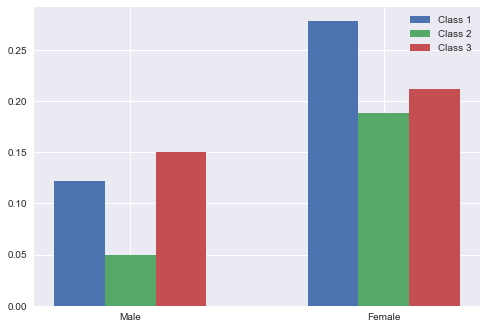

In [296]:
import seaborn

survived = DF_T_trans.loc[DF_T_trans.survived == 1]
numof_survived = len(survived)
numof_survived_male_c1 = len(survived.loc[(survived.sex == 'male') & (survived.pclass == 1)])
numof_survived_male_c2 = len(survived.loc[(survived.sex == 'male') & (survived.pclass == 2)])
numof_survived_male_c3 = len(survived.loc[(survived.sex == 'male') & (survived.pclass == 3)])
numof_survived_female_c1 = len(survived.loc[(survived.sex == 'female') & (survived.pclass == 1)])
numof_survived_female_c2 = len(survived.loc[(survived.sex == 'female') & (survived.pclass == 2)])
numof_survived_female_c3 = len(survived.loc[(survived.sex == 'female') & (survived.pclass == 3)])

c1_propotions = np.array([numof_survived_male_c1, numof_survived_female_c1]) / float(numof_survived)
c2_propotions = np.array([numof_survived_male_c2, numof_survived_female_c2]) / float(numof_survived)
c3_propotions = np.array([numof_survived_male_c3, numof_survived_female_c3]) / float(numof_survived)

bar_width = 0.2
X = np.arange(2)
plt.bar(X              , c1_propotions, width = bar_width)
plt.bar(X + bar_width  , c2_propotions, width = bar_width)
plt.bar(X + 2*bar_width, c3_propotions, width = bar_width)
plt.xticks([0.2, 1.2], ['Male', 'Female'])

plt.legend(['Class 1', 'Class 2', 'Class 3'])
plt.show()

## Binary Age Catagories

6.Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

Because of the existance of repeated ages, the qcut method does not automatically produce equally sized bins: 

In [271]:
pd.qcut(DF_T_trans.age, 2, ['young', 'old']).value_counts()

young    536
old      510
Name: age, dtype: int64

So we first break the ties with a ranking, and then do the bining: 

In [267]:
age_cat = pd.qcut(DF_T_trans.age.rank(method='first'), 2, ['young', 'old'])
age_cat.value_counts()

young    523
old      523
Name: age, dtype: int64

In [277]:
DF_T_trans = DF_T_trans.assign(age_cat=age_cat)

In [301]:
survived = DF_T_trans.loc[DF_T_trans.survived == 1]
numof_survived = len(survived)

def calculate_survival_rate(df):
    return len(df)/numof_survived

In [302]:
Survival_DF = pd.DataFrame(DF_T_trans.groupby(['age_cat', 'pclass', 'sex']).apply(calculate_survival_rate))
Survival_DF.rename(columns = {0:'Survived'})

Survived
age_cat pclass sex             
old     1      female     0.184
               male       0.238
        2      female     0.094
               male       0.168
        3      female     0.086
               male       0.250
young   1      female     0.082
               male       0.064
        2      female     0.112
               male       0.148
        3      female     0.218
               male       0.448